# Phase1:

## Goal of Collecting Dataset:

The aim of analyzing this football match dataset is to conduct a comprehensive performance evaluation of teams and players by examining key metrics such as goals, assists, and other relevant statistics. By leveraging historical data, we aim to build predictive models capable of forecasting match outcomes and individual player performances. Additionally, the analysis seeks to uncover trends and patterns in match results, player statistics, and team strategies, which can provide valuable insights into game dynamics and competitive behaviors.

To achieve these objectives, we will employ clustering and classification techniques using machine learning methods learned during the course.

## Source of Dataset: 
Kaggle Platform Dataset link: https://www.kaggle.com/datasets/evangower/fifa-world-cup

## General Information about the Dataset:

Number of Attributes:15

Number of Objects:900 (Match)

Class Name/Labels: outcome


In [ ]:

import pandas as pd

df = pd.read_csv( )

print(df.info())

num_row = len(df)
print("Number of rows:", num_row)


TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

------------------------------------------------------

# Phase2:

| Attributes Name | Data type | Description | Possible Values |
|----------|----------|----------|----------|
|Year |	Integer| The year of the match |	Any year (e.g., 1930, 1934, etc.)|
|Country |	String |The country hosting the World Cup |  Categorical string values (different possible)|
|City	| String |	The city where the match took place	 | Categorical string values (different possible)|
|Stage	| String|	The stage of the tournament | Categorical string values (different possible)|
|Home Team |	String | The team playing at home |	Categorical string values (different possible)|
|Away Team |	String |	The team playing away |	Categorical string values (different possible)|
|Home Score |	Integer	| The score of the home team |	0-10|
|Away Score	| Integer |	The score of the away team |	0-8|
|Outcome |	String | The result of the match |	H (Home win), A (Away win), D (Draw)|
|Win Conditions |	String |	Conditions under which the winning team was determined	Specific phrases |Categorical string values (different possible)|
|Winning Team |	String | The team that won the match |	Categorical string values (different possible)|
|Losing Team|	String | The team that lost the match |	Categorical string values (different possible)|
|Date |Date |	The date of the match |	Datetime |
|Month |String	|The month in which the match took place|Categorical string values (different possible)|
|DayOfWeek |	String |	The day of the week when the match occurred | Categorical string values (different possible)|


## Sample

In [ ]:
sample=df.sample(frac=1)
print(sample)

     year        country             city          stage      home_team  \
613  2002    South Korea          Incheon        Group A        Denmark   
486  1994  United States  East Rutherford        Group F   Saudi Arabia   
770  2010   South Africa   Port Elizabeth    Third place        Uruguay   
516  1998         France      Saint-Denis        Group A         Brazil   
141  1962          Chile         Rancagua        Group 4        England   
..    ...            ...              ...            ...            ...   
799  2014         Brazil        Fortaleza        Group G        Germany   
83   1954    Switzerland           Zürich        Group 3        Austria   
760  2010   South Africa     Johannesburg    Round of 16         Brazil   
456  1990          Italy             Rome  Quarterfinals          Italy   
489  1994  United States         Pasadena        Group A  United States   

               away_team  home_score  away_score outcome win_conditions  \
613               France

## Show the Min., 1st Qu., Median, Mean ,3rd Qu.,Max. for each numeric column:

In [ ]:
summary_stats=df.describe();
print(summary_stats);

              year  home_score  away_score
count   900.000000  900.000000  900.000000
mean   1986.915556    1.568889    1.262222
std      23.150270    1.489574    1.313960
min    1930.000000    0.000000    0.000000
25%    1970.000000    0.000000    0.000000
50%    1990.000000    1.000000    1.000000
75%    2006.000000    2.000000    2.000000
max    2018.000000   10.000000    8.000000


- Year: The range of year is between 1930 and 2018, with an average year of 1987. Most matches occurred between 1970 and 2006, with a median year of
1990, indicating a relatively even distribution of matches over time.

- Home Score: Home team scores range from 0 to 10 goals, with an average of 1.57 goals per match. While 25% of the matches saw the home team
scoring no goals, the median score is 1, and in 75% of the matches, the home team scored 2 or fewer goals.

- Away Score: Away team scores range from 0 to 8 goals, with an average of 1.26 goals per match. Similar to home teams, 25% of the matches had away
teams scoring no goals, and the median score is 1, with 75% of the away teams scoring 2 or fewer goals.

## Show the Variance:

In [ ]:
variance= df.var(numeric_only=True);
print(variance);

year          535.935019
home_score      2.218831
away_score      1.726491
dtype: float64


Show the Variance :
Variance shows how much values spread out. High variance means more spread, while low variance means values are closer to the average. So, our
variance results show:


Year: The high variance shows significant spread in match years, which is expected due to the wide range [1930-2018]

home score:The variance is relatively low which means there isn't much variation in the scores of the home teams

Away_score: The variance is also low, indicating that there is little variation in the scores of the away teams

## Graphs:

### Understanding the data through graph representations:

To understand the relationship between match outcomes and all available attributes, particularly how they are associated with predicting match results and team performance, the focus was primarily on variables related to teams and final results. This analysis identifies whether a team won or lost, utilizing all attributes to extract relationships and infer whether an increase in a specific attribute (such as goals scored or possession) suggests a higher likelihood of winning the match.

Additionally, the analysis helps determine whether performance is more influenced by factors like venue (home or away) or the ranking differences between teams. This aids in identifying key factors that impact match outcomes and discovering indicators that could assist in predicting future wins or losses.

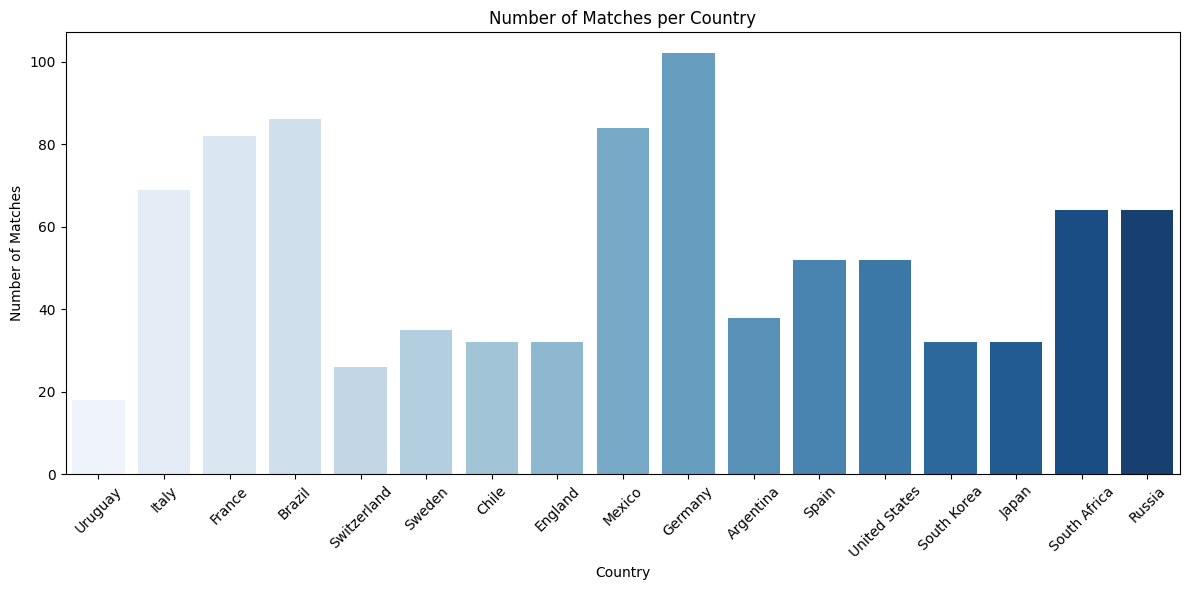

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = 'Dataset/wcmatches.csv'  
data = pd.read_csv(file_path)

plt.figure(figsize=(12, 6))  


sns.countplot(x='country', data=data, palette='Blues', hue='country', legend=False)


plt.title('Number of Matches per Country')  
plt.xlabel('Country')  
plt.ylabel('Number of Matches')


plt.xticks(rotation=45)

plt.tight_layout()  


plt.show()


This is a bar chart showing the number of matches per country. The x-axis lists the countries, while the y-axis represents the number of matches. Germany has the highest number of matches, followed by Brazil, Mexico, and France. The chart provides a clear comparison of match counts across different countries, with countries like Uruguay and Switzerland having the fewest matches.

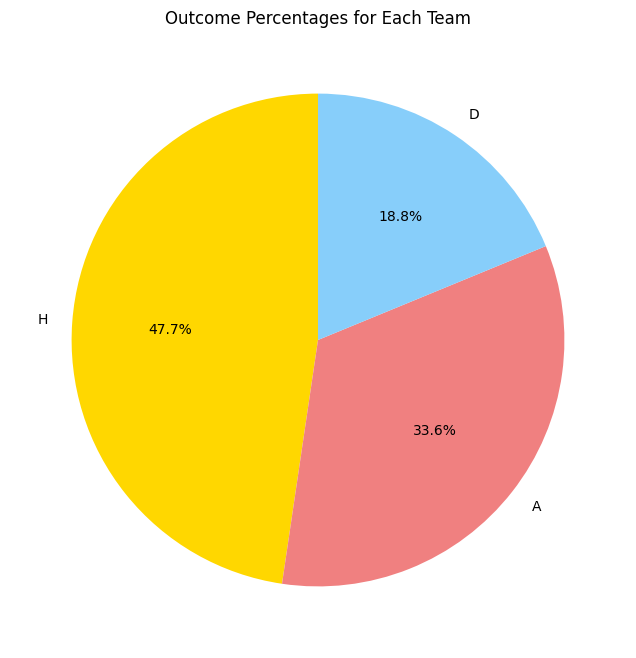

In [ ]:

# Count the outcomes (Win, Loss, Draw) for each team
outcome_counts = data['outcome'].value_counts(normalize=True) * 100  # Calculate percentages

# Plot a pie chart
plt.figure(figsize=(8, 8))  # Set figure size
outcome_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue'])  # Create pie chart

# Customize the plot
plt.title('Outcome Percentages for Each Team')  # Add title
plt.ylabel('')  # Remove the default y-axis label
plt.show()  # Display the chart


This pie chart shows the percentages of different match outcomes: Wins, Losses, and Draws. The outcomes are represented by three colors: gold for Wins (47.7%), lightcoral for Losses (33.6%), and lightskyblue for Draws (18.8%). Each slice indicates the proportion of matches that resulted in each outcome, with the percentages labeled directly on the chart.

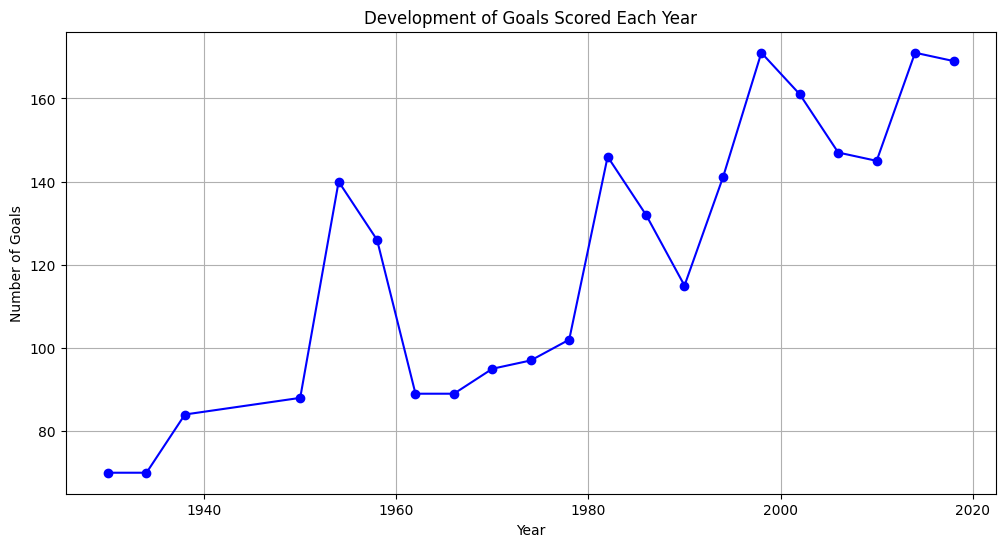

In [ ]:
# Count the goals scored each year
goals_per_year = data.groupby('year').agg({'home_score': 'sum', 'away_score': 'sum'}).sum(axis=1)

# Plot the chart
plt.figure(figsize=(12, 6))
goals_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Development of Goals Scored Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.grid()
plt.show()

This line chart illustrates the total number of goals scored each year from the 1940s to the 2010s. The chart shows fluctuations in scoring patterns, with noticeable peaks around the 1950s, 1980s, and 2000s. The overall trend indicates a general increase in the number of goals over time.

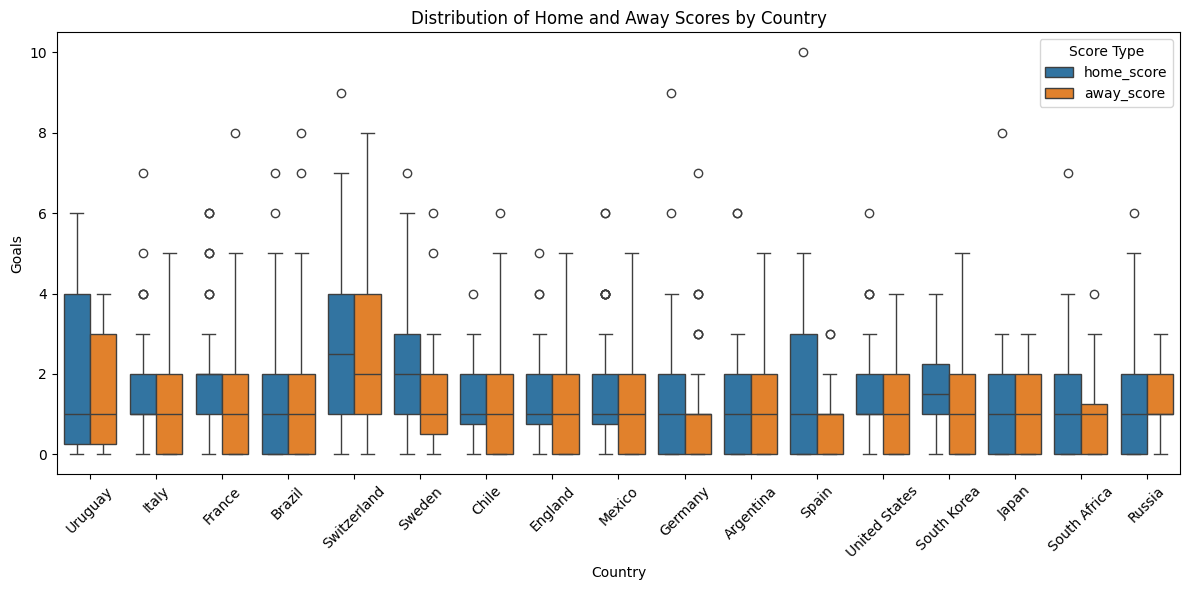

In [ ]:
import seaborn as sns

# Melt the DataFrame to have a single column for scores
melted_data = data.melt(id_vars=['country'], value_vars=['home_score', 'away_score'], 
                         var_name='Score Type', value_name='Score')

# Set the figure size for the plots
plt.figure(figsize=(12, 6))

# Create box plots for home and away scores by country
sns.boxplot(x='country', y='Score', hue='Score Type', data=melted_data)

# Customize the plot
plt.title('Distribution of Home and Away Scores by Country')
plt.xlabel('Country')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.legend(title='Score Type')

# Show the plot
plt.tight_layout()
plt.show()



This box plot compares the distribution of home and away scores for various countries. Each country shows two box plots: blue for home scores and orange for away scores. The plots represent the range (from minimum to maximum), interquartile range (IQR), and median goals. Outliers are marked as individual points. The chart illustrates scoring differences between home and away games across countries, with some variation in the spread and outliers, indicating differing goal tendencies when teams play at home versus away.

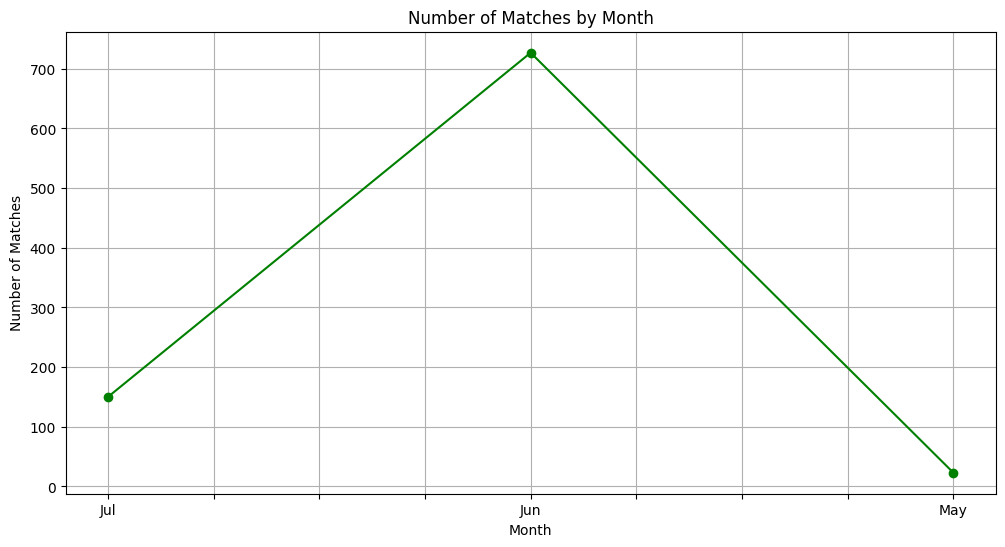

In [ ]:
# Count the number of matches by month
matches_per_month = data['month'].value_counts().sort_index()

# Plot the chart
matches_per_month.plot(kind='line', figsize=(12, 6), marker='o', color='green')
plt.title('Number of Matches by Month')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.grid()
plt.show()

This line chart shows the number of matches played by month, with data points for May, June, and July. June has the highest number of matches, peaking at over 700, while May and July have significantly fewer matches, with around 100-200 matches each. The trend is steeply upward from May to June, followed by a sharp decline from June to July.

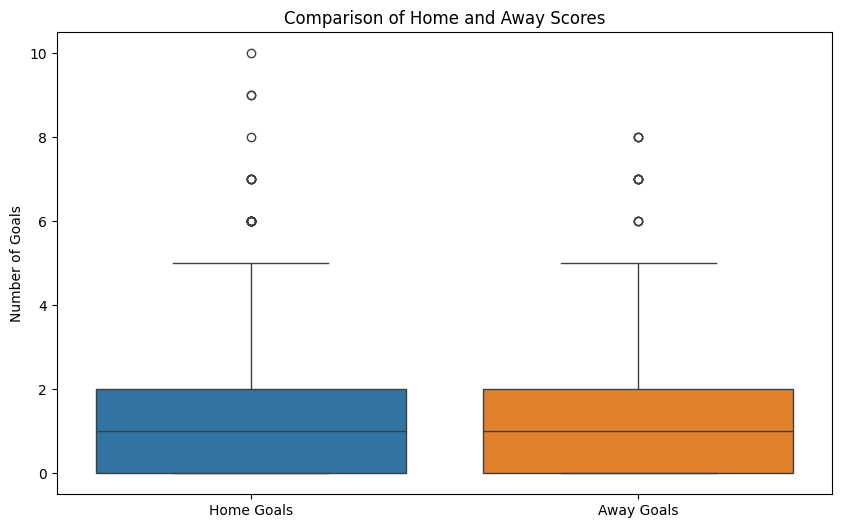

In [ ]:
# Plot the chart
plt.figure(figsize=(10, 6))
sns.boxplot(data=[data['home_score'], data['away_score']], orient='v')
plt.title('Comparison of Home and Away Scores')
plt.xticks([0, 1], ['Home Goals', 'Away Goals'])
plt.ylabel('Number of Goals')
plt.show()


This box plot compares home and away goals across matches. The blue box represents home goals, and the orange box represents away goals. Both distributions show a similar median (around 1-2 goals), with slightly more variability in home goals. The home goals also have a few high outliers, going up to 9 or 10 goals, while away goals show fewer extreme outliers. Overall, the range of goals scored is similar for both home and away matches, though home games have a slightly broader distribution.

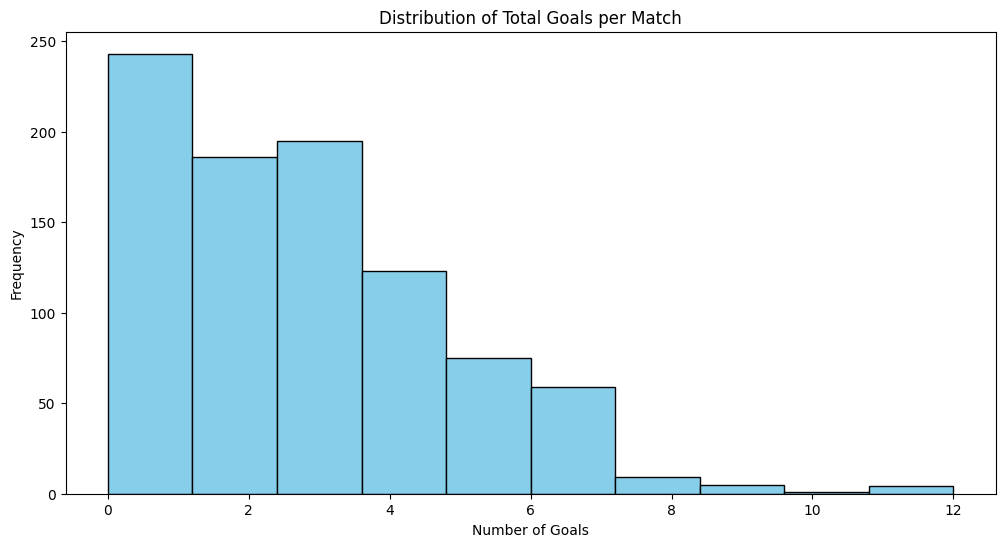

In [ ]:
import matplotlib.pyplot as plt

# Calculate total goals (home and away) per match
total_goals = data['home_score'] + data['away_score']

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(total_goals, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Goals per Match')
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.show()


This histogram shows the distribution of total goals scored per match. The x-axis represents the number of goals per match, while the y-axis shows the frequency of matches with those goal totals. Most matches see between 0 and 4 goals, with fewer matches having higher goal counts. The chart highlights that scoreless or low-scoring games are the most common.

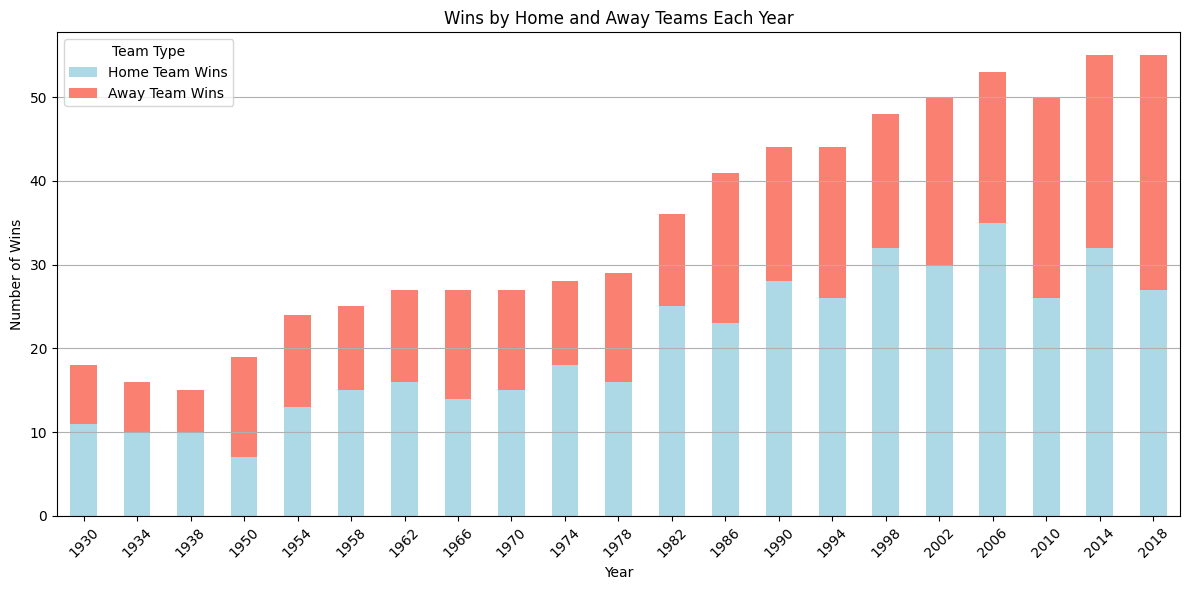

In [ ]:

# Count wins for home and away teams per year
# Home wins are where outcome is 'H' and away wins are where outcome is 'A'
wins_per_year = data.groupby('year').agg(
    home_wins=('outcome', lambda x: (x == 'H').sum()),  # Count home wins ('H')
    away_wins=('outcome', lambda x: (x == 'A').sum())   # Count away wins ('A')
)

# Plot the stacked bar chart
wins_per_year.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightblue', 'salmon'])
plt.title('Wins by Home and Away Teams Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Team Type', labels=['Home Team Wins', 'Away Team Wins'])
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


The stacked bar chart illustrates the distribution of home and away team wins by year from 1930 to 2018. Home wins are shown in blue, and away wins are in red. Over time, both home and away wins have increased, particularly after the 1980s. While home teams generally secure more victories, away wins also show an upward trend, especially in the later years. The total number of matches and wins grows consistently over time.

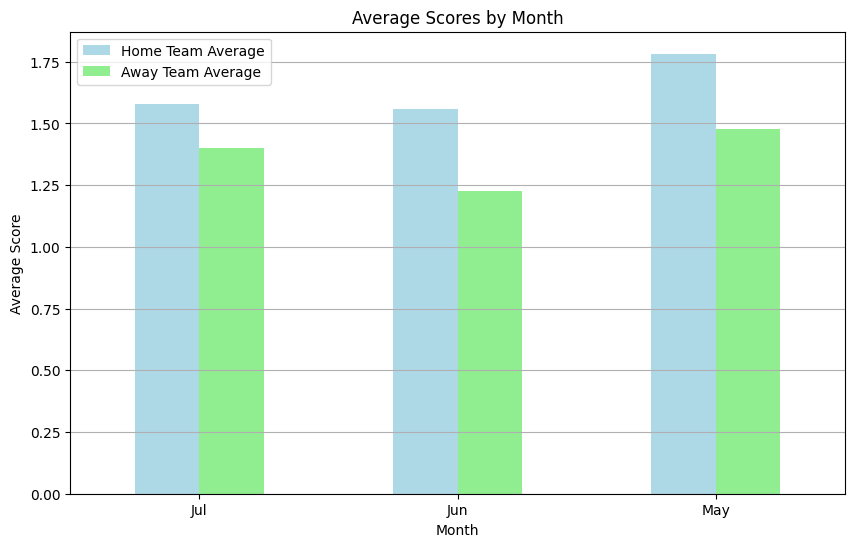

In [ ]:
# Calculate average scores for home and away teams by month
average_scores = data.groupby('month').agg({'home_score': 'mean', 'away_score': 'mean'})

# Plot the bar chart
average_scores.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightgreen'])
plt.title('Average Scores by Month')
plt.xlabel('Month')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(['Home Team Average', 'Away Team Average'])
plt.grid(axis='y')
plt.show()



This bar chart, titled "Average Scores by Month," compares the average scores of home teams (in blue) and away teams (in green) for the months of July, June, and May. The x-axis represents the months, while the y-axis shows the average score. For each month, home teams consistently have a higher average score compared to away teams. The highest average for home teams is in May, with around 1.75, while away teams have their highest average in May as well, but slightly lower at about 1.5. Overall, the chart illustrates that home teams tend to score more than away teams across these months.

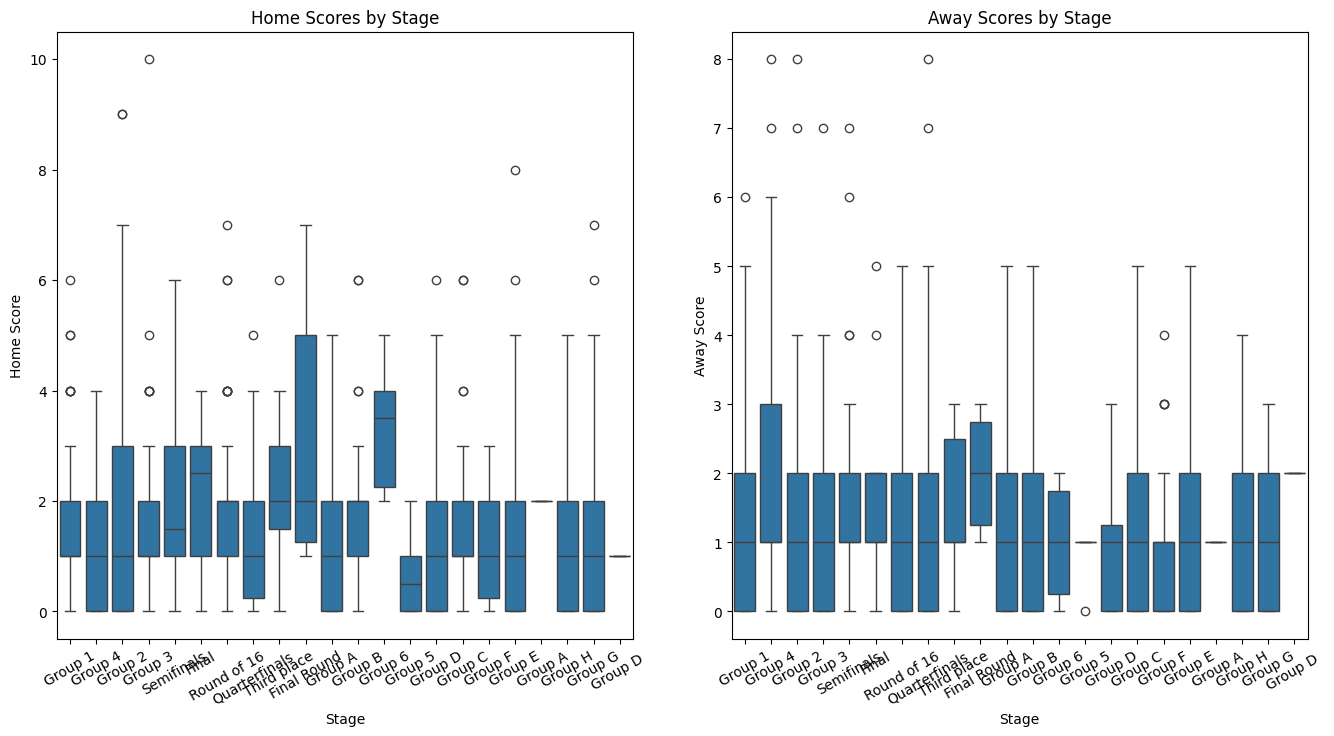

In [ ]:

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='stage', y='home_score', data=data)
plt.title('Home Scores by Stage')
plt.xlabel('Stage')
plt.ylabel('Home Score')
plt.xticks(rotation=30)

plt.subplot(1, 2, 2)
sns.boxplot(x='stage', y='away_score', data=data)
plt.title('Away Scores by Stage')
plt.xlabel('Stage')
plt.ylabel('Away Score')
plt.xticks(rotation=30)

plt.tight_layout(pad=3.0)
plt.show()


This boxplots compare home and away scores across different stages of a tournament. The left plot represents home scores, and the right plot represents away scores. The x-axis lists various tournament stages (e.g., Group 1, Semifinals, Finals), while the y-axis shows the scores. Each boxplot displays the median, interquartile range, and outliers (indicated by circles). The spread and distribution of scores vary across stages, with some stages showing more outliers and higher scores than others.

## Data Preprocessing :

### Data Cleaning:

#### 1-Remove duplicates:

##### First, we count the number of duplicates rows, and then we remove them:

In [ ]:
import pandas as pd
data = pd.read_csv('Dataset/wcmatches.csv')
num_duplicates = data.duplicated().sum()
data_cleaned = data.drop_duplicates()
print("Number of duplicate rows:", num_duplicates)
print("DataFrame after dropping all duplicate rows:")
print(data_cleaned)
data_cleaned.to_csv('Dataset/Clean_dataset.csv', index=False)

Number of duplicate rows: 0
DataFrame after dropping all duplicate rows:
     year  country              city          stage  home_team      away_team  \
0    1930  Uruguay        Montevideo        Group 1     France         Mexico   
1    1930  Uruguay        Montevideo        Group 4    Belgium  United States   
2    1930  Uruguay        Montevideo        Group 2     Brazil     Yugoslavia   
3    1930  Uruguay        Montevideo        Group 3       Peru        Romania   
4    1930  Uruguay        Montevideo        Group 1  Argentina         France   
..    ...      ...               ...            ...        ...            ...   
895  2018   Russia             Sochi  Quarterfinals     Russia        Croatia   
896  2018   Russia  Saint Petersburg     Semifinals     France        Belgium   
897  2018   Russia            Moscow     Semifinals    Croatia        England   
898  2018   Russia  Saint Petersburg    Third place    Belgium        England   
899  2018   Russia            Moscow

This shows that our dataset has no duplicate rows, so the total number of rows remains unchanged at 900.

#### 2-Handling Missing Values: 

##### First, we calculate the number of missing values in our dataset:

In [ ]:
import pandas as pd
data = pd.read_csv('Dataset/Clean_dataset.csv');
sample=data.sample(n=20);
print(sample);
missing_values = data.isna()
missing_counts = missing_values.sum();
rows_with_missing = data[data.isna().any(axis=1)];

print("Missing values in each column:");
print(missing_counts);
print("\nRows with missing values:");
print(rows_with_missing);

     year        country               city          stage       home_team  \
526  1998         France           Toulouse        Group H       Argentina   
41   1938         France          Marseille    Round of 16           Italy   
828  2014         Brazil          Fortaleza  Quarterfinals          Brazil   
695  2006        Germany          Nuremberg    Round of 16        Portugal   
220  1970         Mexico               León        Group 4        Bulgaria   
621  2002          Japan           Yokohama        Group G         Ecuador   
787  2014         Brazil          Fortaleza        Group A          Brazil   
218  1970         Mexico               León        Group 4    West Germany   
481  1994  United States          Palo Alto        Group B          Brazil   
662  2006        Germany          Nuremberg        Group B         England   
669  2006        Germany  Frankfurt am Main        Group D        Portugal   
782  2014         Brazil           Brasília        Group E     S

This shows that our dataset has missing values in multiple columns: 838 in the 'win_conditions' column, 169 in the 'winning_team' column, and 169 in the 'losing_team' column.

##### Secondly, we handle these missing values by subsituting with the appropriate constant value ['win_conditions', 'winning_team', 'losing_team']

In [ ]:
import pandas as pd

data = pd.read_csv('Dataset/Clean_dataset.csv')

data.columns = data.columns.str.strip()


for column in ['winning_team', 'losing_team']:
    data[column] = data[column].fillna(value='Draw match')

for column in ['win_conditions']:
    data[column] = data[column].fillna(value='no win conditions')
    
print("Missing values after filling:")
print(data.isnull().sum())

data.to_csv('Dataset/Clean_dataset.csv', index=False)



Missing values after filling:
year              0
country           0
city              0
stage             0
home_team         0
away_team         0
home_score        0
away_score        0
outcome           0
win_conditions    0
winning_team      0
losing_team       0
date              0
month             0
dayofweek         0
dtype: int64


In our project, we addressed missing values by applying a consistent approach. For columns like 'winning_team' and 'losing_team', we filled the missing entries with 'Draw match', as the absence of data indicated a tie. Similarly, for the 'win_conditions' column, we used 'no win conditions' to represent cases where no specific conditions applied. This method ensures data completeness without altering or discarding valuable information.

#### 3-Handling Outliers:

##### Before we handle our outliers we did choose the IQR method Based on our dataset to identify how many outliers in our dataset.

In [ ]:
import pandas as pd
data = pd.read_csv('Dataset/Clean_dataset.csv')
import numpy as np
outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

numeric_columns = data.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
year: 0 rows with outliers
home_score: 24 rows with outliers
away_score: 11 rows with outliers
Total Rows with Outliers: 35


The analysis of our dataset revealed that a total of 35 rows contain outliers, which is a small proportion compared to the overall dataset of 900 rows. Specifically, there are 0 rows with outliers in the 'year' column, 24 rows in the 'home_score' column, and 11 rows in the 'away_score' column. Although this represents a limited number of outliers, their presence indicates some extreme values that deviate from the majority of the data. To address this issue, we have decided to adopt a strategy of capping the outliers. Rather than removing these data points entirely, we opted to replace them with the nearest non-outlier values. This approach allows us to retain the entirety of our dataset while mitigating the impact of these extreme values on our subsequent analyses. By capping the outliers and maintaining the remaining data, we aim to preserve the integrity of the dataset and avoid the potential loss of valuable information that would occur through outright removal of the outliers. This ensures that our analysis incorporates as much relevant information as possible while still accounting for the presence of extreme observations

##### Handling Outliers:

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('Dataset/Clean_dataset.csv')

outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

numeric_columns = data.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows = len(data)

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    data[column] = np.clip(data[column], lower_bound, upper_bound)

data.to_csv('Dataset/Clean_dataset.csv', index=False)


##### Checking the results by counting outliers after handling them.

In [ ]:
import pandas as pd
import numpy as np

data1 = pd.read_csv('Dataset/Clean_dataset.csv')

outlier_threshold = 1.5

def count_outliers(column_data1):
    q1 = np.percentile(column_data1, 25)
    q3 = np.percentile(column_data1, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data1 > upper_bound) | (column_data1 < lower_bound)
    return sum(outliers)


numeric_columns = data1.select_dtypes(include=[np.number]).columns


outlier_counts = {}
total_rows_with_outliers = 0


for column in numeric_columns:
    outliers = count_outliers(data1[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data1)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")


Outlier Counts:
year: 0 rows with outliers
home_score: 0 rows with outliers
away_score: 0 rows with outliers
Total Rows with Outliers: 0


### Data Transmission

#### 1-Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data1 = pd.read_csv('Dataset/Clean_dataset.csv')

le = LabelEncoder()
data1['country'] = le.fit_transform(data1['country'])
data1['city'] = le.fit_transform(data1['city'])
data1['stage'] = le.fit_transform(data1['stage'])
data1['dayofweek'] = le.fit_transform(data1['dayofweek'])
data1['month'] = le.fit_transform(data1['month'])
data1['home_team'] = le.fit_transform(data1['home_team'])
data1['away_team'] = le.fit_transform(data1['away_team'])
data1['losing_team'] = le.fit_transform(data1['losing_team'])
data1['winning_team'] = le.fit_transform(data1['winning_team'])
data1['outcome'] = le.fit_transform(data1['outcome'])
data1['win_conditions'] = le.fit_transform(data1['win_conditions'])

print('Encoded DataFrame')
print(data1.head())
data1.to_csv('Dataset/encoding_normaliztion.csv', index=False)

Encoded DataFrame
   year  country  city  stage  home_team  away_team  home_score  away_score  \
0  1930       16    83      3         27         42           4           1   
1  1930       16    83      6          5         76           0           3   
2  1930       16    83      4          8         80           1           2   
3  1930       16    83      5         52         56           1           3   
4  1930       16    83      3          2         27           1           0   

   outcome  win_conditions  winning_team  losing_team        date  month  \
0        2              48            22           46  1930-07-13      0   
1        0              48            62            5  1930-07-13      0   
2        0              48            66            8  1930-07-14      0   
3        0              48            45           56  1930-07-14      0   
4        2              48             1           30  1930-07-15      0   

   dayofweek  
0          3  
1          3  
2    

several nominal attributes have been encoded using the LabelEncoder. These attributes include country, city, stage, dayofweek, and month, home_team, away_team, losing_team, and winning_team. Each of these columns has been transformed from its original categorical form into a numerical format. For instances cities being numbered '83' to perform analysis

#### 2-Normalization

In [ ]:
import pandas as pd
data1 = pd.read_csv('Dataset/encoding_normaliztion.csv')

columns_to_normalize = ['home_score', 'away_score']

for column in columns_to_normalize:
    max_abs_value = data1[column].abs().max()
    data1[column] = data1[column] / (10 ** len(str(int(max_abs_value))))


print("DataFrame after Decimal Scaling Normalization:")
print(data1.head())
data1.to_csv('Dataset/encoding_normaliztion.csv', index=False)

DataFrame after Decimal Scaling Normalization:
   year  country  city  stage  home_team  away_team  home_score  away_score  \
0  1930       16    83      3         27         42        0.04        0.01   
1  1930       16    83      6          5         76        0.00        0.03   
2  1930       16    83      4          8         80        0.01        0.02   
3  1930       16    83      5         52         56        0.01        0.03   
4  1930       16    83      3          2         27        0.01        0.00   

   outcome  win_conditions  winning_team  losing_team        date  month  \
0        2              48            22           46  1930-07-13      0   
1        0              48            62            5  1930-07-13      0   
2        0              48            66            8  1930-07-14      0   
3        0              48            45           56  1930-07-14      0   
4        2              48             1           30  1930-07-15      0   

   dayofweek  
0     

Home and away scored have been normalized using decimal scaling to  become values between [0,1]

#### 3-Aggregation

In [ ]:
import pandas as pd
data1 = pd.read_csv('Dataset/encoding_normaliztion.csv')

country_stats = data1.groupby('country').agg(
    home_score_mean=('home_score', 'mean'),
    away_score_mean=('away_score', 'mean'),
    total_wins=('winning_team', lambda x: (x == x.mode()[0]).sum())  
).reset_index()

print("Country Stats:")
print(country_stats)

Country Stats:
    country  home_score_mean  away_score_mean  total_wins
0         0         0.014211         0.012105           9
1         1         0.014419         0.014767          12
2         2         0.014063         0.013437           5
3         3         0.014375         0.013437           5
4         4         0.017561         0.012805          19
5         5         0.013824         0.009412          21
6         6         0.014783         0.011739          10
7         7         0.011250         0.010000           8
8         8         0.014762         0.012024          16
9         9         0.013594         0.012656           9
10       10         0.011719         0.010625          14
11       11         0.016250         0.011875           6
12       12         0.017308         0.009808          16
13       13         0.019143         0.015714          10
14       14         0.025000         0.022692           5
15       15         0.015577         0.011346           8

The aggregation summarizes match data by country, calculating the average home and away team scores, as well as counting the number of wins for the most frequent winning team in each country.

#### 4-Discretization

In [ ]:
import pandas as pd
data1 = pd.read_csv('Dataset/encoding_normaliztion.csv')
year_labels = ["1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s",]
year_bins = [1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019,]
data1["Year_Decade"] = pd.cut(data1["year"], bins=year_bins, labels=year_labels, right=False)
data1['date'] = pd.to_datetime(data1['date'])
data1['Month'] = data1['date'].dt.month_name()
print(data1.head())
data1.to_csv('Dataset/after_discretization.csv', index=False)

   year  country  city  stage  home_team  away_team  home_score  away_score  \
0  1930       16    83      3         27         42         0.4         0.1   
1  1930       16    83      6          5         76         0.0         0.3   
2  1930       16    83      4          8         80         0.1         0.2   
3  1930       16    83      5         52         56         0.1         0.3   
4  1930       16    83      3          2         27         0.1         0.0   

   outcome     win_conditions  winning_team  losing_team       date  month  \
0        2  no win conditions            22           46 1930-07-13      0   
1        0  no win conditions            62            5 1930-07-13      0   
2        0  no win conditions            66            8 1930-07-14      0   
3        0  no win conditions            45           56 1930-07-14      0   
4        2  no win conditions             1           30 1930-07-15      0   

   dayofweek Year_Decade Month  
0          3       1930

discretizes the "year" column into decades by categorizing it into decade ranges, assigns each entry a decade label, converts the "date" column to a datetime format, and extracts the month name from the date into a new "Month" column

## Feature Selection:

#### 1. Chi-Square Test for Nominal Features:

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
data1 = pd.read_csv('Dataset/after_discretization.csv')
data1 = pd.DataFrame(data1)

# Create a contingency table for each categorical feature against the outcome
nominal_features = ['home_team', 'away_team', 'stage', 'country', 'city', 'win_conditions', 'winning_team', 'losing_team', 'Year_Decade']

chi2_results = {}

# Iterate through categorical features and perform Chi-Square test
for feature in nominal_features:
    contingency_table = pd.crosstab(data1[feature], data1['outcome'])
    
    print(f"\nContingency Table for {feature}:")
    print(contingency_table)
    
    # Perform the Chi-Square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print("\nChi-Square Statistic:", chi2_stat)
    print("Degrees of Freedom:", dof)
    print("p-value:", p_value)
    print("Expected Frequencies:")
    print(expected)

    chi2_results[feature] = p_value

# Identify significant nominal features (p < 0.05)
significant_nominal_features = [f for f, p in chi2_results.items() if p < 0.05]
print("\nSignificant Categorical Features (p < 0.05):", significant_nominal_features)






Contingency Table for home_team:
outcome     A  D   H
home_team           
0           3  2   1
1           1  0   0
2          13  7  40
3           3  1   2
4           9  2   9
...        .. ..  ..
76          8  2   3
77          7  3   9
78          5  8  30
79          1  1   3
80          2  0   0

[81 rows x 3 columns]

Chi-Square Statistic: 245.6142273718769
Degrees of Freedom: 160
p-value: 1.5649138090896725e-05
Expected Frequencies:
[[ 2.01333333  1.12666667  2.86      ]
 [ 0.33555556  0.18777778  0.47666667]
 [20.13333333 11.26666667 28.6       ]
 [ 2.01333333  1.12666667  2.86      ]
 [ 6.71111111  3.75555556  9.53333333]
 [ 8.72444444  4.88222222 12.39333333]
 [ 1.34222222  0.75111111  1.90666667]
 [ 0.33555556  0.18777778  0.47666667]
 [28.18666667 15.77333333 40.04      ]
 [ 4.36222222  2.44111111  6.19666667]
 [ 3.69111111  2.06555556  5.24333333]
 [ 0.33555556  0.18777778  0.47666667]
 [ 7.04666667  3.94333333 10.01      ]
 [ 0.33555556  0.18777778  0.47666667]
 [ 3.

The Chi-Square test results revealed the following relationships with match outcomes:

**1- Significant Relationships:**
- **home_team**: p-value = 1.56e-5
- **away_team**: p-value = 0.00954
- **stage**: p-value = 5.48e-7
- **winning_team**: p-value = 1.66e-81
- **losing_team**: p-value = 4.20e-92

All of these features have **p-values < 0.05**, indicating significant relationships with match outcomes.

**2- Non-Significant Relationships:**
- **country**: p-value = 0.457
- **city**: p-value = 0.074
- **win_conditions**: p-value = 0.956
- **Year_Decade**: p-value = 0.287

These features exhibit **p-values > 0.05**, suggesting no significant association with the outcomes.



#### 2. Correlation Analysis for Numerical Features

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Dataset/after_discretization.csv") 

# Convert the 'outcome' column to numerical values
data['outcome_numeric'] = data['outcome'].map({'H': 1, 'A': 0, 'D': -1})


# Correlation calculations with respect to the outcome
cor_year_score = data['year'].corr(data['outcome_numeric'])
cor_home_score = data['home_score'].corr(data['outcome_numeric'])
cor_away_score = data['away_score'].corr(data['outcome_numeric'])

# Print correlation coefficients
print("\nCorrelation coefficients with respect to the outcome:")
print(f"Year: {cor_year_score:.4f}")
print(f"Home Score: {cor_home_score:.4f}")
print(f"Away Score: {cor_away_score:.4f}")

# Identify significant numerical features (|correlation| > 0.3)
threshold = 0.3 
significant_numerical_features = []

if abs(cor_year_score) > threshold:
    significant_numerical_features.append('year')
if abs(cor_home_score) > threshold:
    significant_numerical_features.append('home_score')
if abs(cor_away_score) > threshold:
    significant_numerical_features.append('away_score')

print("\nSignificant Numerical Features (|correlation| > 0.3):", significant_numerical_features)




Correlation coefficients with respect to the outcome:
Year: -0.0268
Home Score: 0.5241
Away Score: -0.2593

Significant Numerical Features (|correlation| > 0.3): ['home_score']


In this code, we calculated correlation coefficients to assess the strength and direction of the linear relationship between numeric attributes and the match outcome. Notably, the correlation coefficients revealed that the Home Score has a strong positive relationship (0.5241) with the outcome, while the Away Score shows a weaker negative relationship (-0.2593). The Year exhibits a negligible correlation (-0.0268), indicating little to no linear relationship with the match outcome.


#### 3.Significant Features From All Methods

In [ ]:
selected_features = significant_nominal_features + significant_numerical_features

print("\nSignificant Features:")
print(selected_features)




Significant Features:
['home_team', 'away_team', 'stage', 'winning_team', 'losing_team', 'home_score']


#### 4.Dropping Less Significant Attributes

We will retain all attributes in our dataset for clustering exploration, as each feature contributes valuable information that may enhance the analysis and uncover meaningful patterns.

In [ ]:
data1= pd.read_csv('Dataset/after_discretization.csv')
# Save the updated dataset
data1.to_csv('Dataset/Preprocessed_dataset.csv', index=False)
print(data1);

     year  country  city  stage  home_team  away_team  home_score  away_score  \
0    1930       16    83      3         27         42         0.4         0.1   
1    1930       16    83      6          5         76         0.0         0.3   
2    1930       16    83      4          8         80         0.1         0.2   
3    1930       16    83      5         52         56         0.1         0.3   
4    1930       16    83      3          2         27         0.1         0.0   
..    ...      ...   ...    ...        ...        ...         ...         ...   
895  2018        9   134     18         57         16         0.2         0.2   
896  2018        9   120     20         27          5         0.1         0.0   
897  2018        9    85     20         16         25         0.2         0.1   
898  2018        9   120     21          5         25         0.2         0.0   
899  2018        9    85      1         27         16         0.4         0.2   

     outcome               